### Deer Data (loading the data)

This notebooks loads the deer data. Thinks you might want to try are: 

* Poisson Regression
* Zero Infated Poisson Regression
* Mixture of Discrete Logistics 

For a real good results, you might also want to do some feature engineering.

In [1]:
import tensorflow as tf
try: #If running in colab 
    import google.colab
    IN_COLAB = True 
except:
  
    IN_COLAB = False
if (not tf.__version__.startswith('2')): #Checking if tf 2.0 is installed
    if IN_COLAB: #If running in colab install tf 2.0
        !pip install tensorflow==2.0.0-alpha0
        !pip install pip install tfp-nightly==0.7.0-dev20190511
    print('Please install tensorflow 2.0 to run this notebook')
print('Tensorflow version: ',tf.__version__, ' running in colab?: ', IN_COLAB)

Tensorflow version:  2.0.0-alpha0  running in colab?:  False


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns
import tensorflow_probability as tfp

sns.reset_defaults()
#sns.set_style('whitegrid')
sns.set_context(context='talk',font_scale=0.7)


%matplotlib inline
plt.style.use('default')

tfd = tfp.distributions
tfb = tfp.bijectors
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
print("TFP Version", tfp.__version__)
print("TF  Version",tf.__version__)
np.random.seed(42)
tf.random.set_seed(42)

TFP Version 0.7.0-dev20190511
TF  Version 2.0.0-alpha0


## Loading the data

In [3]:
try:
    import feather
except:
    !pip install feather-format
    import feather

In [4]:
from urllib.request import urlretrieve
import os
def get_if_not_there(filename = 'deer_train.feather'):
    if not os.path.isfile(filename):
         urlretrieve('https://raw.githubusercontent.com/tensorchiefs/dl_book/master/data/{}'.format(filename),
                    filename = filename)

get_if_not_there('deer_train.feather')
get_if_not_there('deer_test.feather')

In [5]:
import pandas as pd
import numpy as np
df_train = feather.read_dataframe('deer_train.feather')
df_test = feather.read_dataframe('deer_test.feather')
df_test[0:2]

,wild,year,time,daytime,weekday
0,0,2010.0,2922.000000,night.am,Sunday
1,2,2010.0,2922.020833,night.am,Sunday


In [6]:
y_tr = df_train.iloc[:,0].to_numpy(dtype='float32')
y_te = df_test.iloc[:,0].to_numpy(dtype='float32')
X_tr = pd.get_dummies(df_train.iloc[:,2:]) #We don't need the year
X_te = pd.get_dummies(df_test.iloc[:,2:])
X_tr.iloc[:,0] = X_tr.iloc[:,0]/2922.02    #We divide by the maximal number to something in the range 0 to 1
X_te.iloc[:,0] = X_te.iloc[:,0]/2922.02 
del df_train, df_test

In [7]:
X_tr[0:2]

,time,daytime_day.am,daytime_night.am,daytime_pre.sunrise.am,daytime_post.sunrise.am,daytime_day.pm,daytime_night.pm,daytime_pre.sunset.pm,daytime_post.sunset.pm,weekday_Monday,weekday_Tuesday,weekday_Wednesday,weekday_Thursday,weekday_Friday,weekday_Saturday,weekday_Sunday
0,0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0.000007,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [8]:
X_te[0:2]

,time,daytime_day.am,daytime_night.am,daytime_pre.sunrise.am,daytime_post.sunrise.am,daytime_day.pm,daytime_night.pm,daytime_pre.sunset.pm,daytime_post.sunset.pm,weekday_Monday,weekday_Tuesday,weekday_Wednesday,weekday_Thursday,weekday_Friday,weekday_Saturday,weekday_Sunday
0,0.999993,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [9]:
X_tr = X_tr.to_numpy(dtype='float32')
X_te = X_te.to_numpy(dtype='float32')
d = X_te.shape[1]
# In R
#> sum(df.train$wild);sum(df.test$wild)
#[1] 265911
#[1] 75744
np.sum(y_te),np.sum(y_tr),X_tr.shape

(75744.0, 265911.0, (140256, 16))

In [10]:
#### Some exploratory analysis

38.0

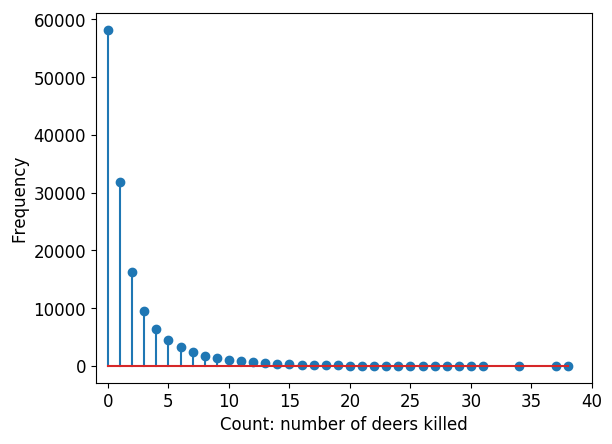

In [11]:
plt.style.use('default')
plt.rcParams.update({'font.size': 12})
vals, counts = np.unique(y_tr, return_counts=True)
plt.stem(vals, counts)
plt.xlabel('Count: number of deers killed')
plt.ylabel('Frequency')
plt.xlim(-1,40)
plt.savefig('ch05_deer.pdf')
np.max(y_tr)